# Katrina Multiple

In [7]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt
import adcircpy
from adcircpy.outputs import (
    Maxele,
    MaximumElevationTimes,
    Fort63,
    Fort61,
    Minpr,
    Maxwvel,
    Maxvel,
)
from sithom.plot import plot_defaults
from src.constants import KAT_EX_PATH, NO_BBOX, DATA_PATH

plot_defaults()

In [9]:
from src.models.generation import mult_folder_name

In [10]:
NO_BBOX.lon

[-92, -86.5]

In [11]:
NO_BBOX.lat

[28.5, 30.8]

In [24]:
@np.vectorize
def indices_in_bbox(lon, lat):
    return (
        lon > NO_BBOX.lon[0]
        and lon < NO_BBOX.lon[1]
        and lat > NO_BBOX.lat[0]
        and lat < NO_BBOX.lat[1]
    )


(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
41
maxele 0.8063978590381901
x -89.3921322251
y 30.068050121199995
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 1.3716277046232697
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 2.36487240097217
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 3.7015398077287935
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 5.052026875981491
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 6.461693715212344
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 7.974476211847994
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 9.548758766044848
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 11.1859322937498
x -89.4012227933
y 30.2602388385
(8303,)
(8303,)
(8303,)
(14761, 3)
(286,)
27
maxele 12.870316021238

Text(0.5, 0, 'Katrina windspeed multiple [dimensionless]')

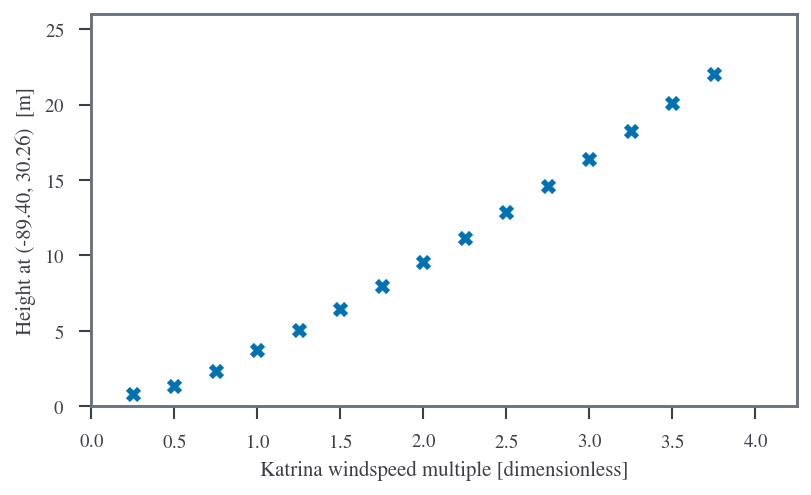

In [25]:
plot_defaults()
height_list = []
mult_list = sorted(
    [x / 4 for x in range(16) if x not in list(range(0, 16, 4))]
    + [x for x in range(1, 4)]
)
# [1, 2, 3, 4]

for i in mult_list:
    folder = mult_folder_name(i)
    path = os.path.join(folder, "maxele.63.nc")
    maxele = Maxele(path, crs="EPSG:4326")
    print(maxele.values.shape)
    print(maxele.x.shape)
    print(maxele.y.shape)
    print(maxele.triangles.shape)
    indices = indices_in_bbox(maxele.x, maxele.y)
    print(maxele.values[indices].shape)
    index = (-maxele.values[indices]).argmin()
    print(index)
    height_list.append(maxele.values[indices][27])
    print("maxele", maxele.values[indices][index])
    print("x", maxele.x[indices][index])
    print("y", maxele.y[indices][index])

plt.scatter(mult_list, height_list)
plt.ylabel("Height at (-89.40, 30.26)  [m]")
plt.xlim([0, 4.25])
plt.ylim([0, 26])
plt.xlabel("Katrina windspeed multiple [dimensionless]")

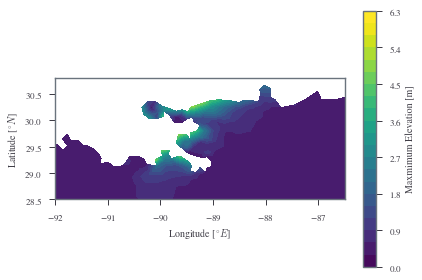

<Figure size 432x288 with 0 Axes>

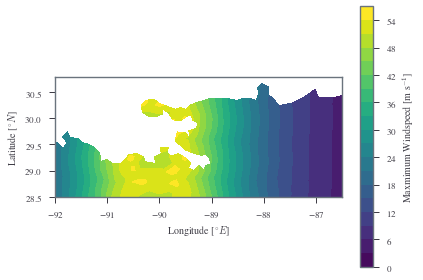

In [18]:
folder = os.path.join(DATA_PATH, "kat_h80")
path = os.path.join(folder, "maxele.63.nc")
maxele = Maxele(path, crs="EPSG:4326")
maxele.tricontourf(cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()
plt.clf()
path = os.path.join(folder, "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

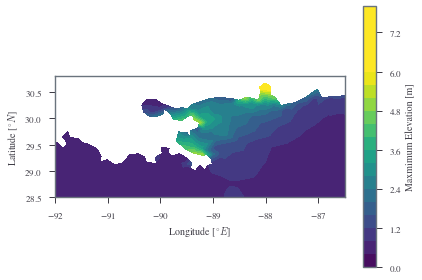

<Figure size 432x288 with 0 Axes>

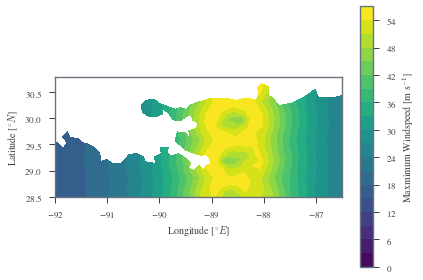

In [19]:
folder = os.path.join(DATA_PATH, "katd_h08")
path = os.path.join(folder, "maxele.63.nc")
maxele = Maxele(path, crs="EPSG:4326")
maxele.tricontourf(cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()
plt.clf()
path = os.path.join(folder, "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

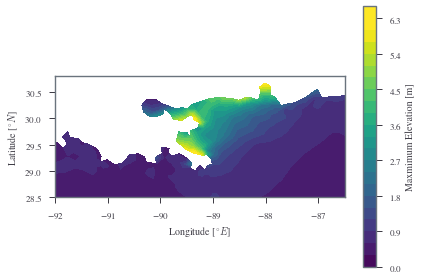

<Figure size 432x288 with 0 Axes>

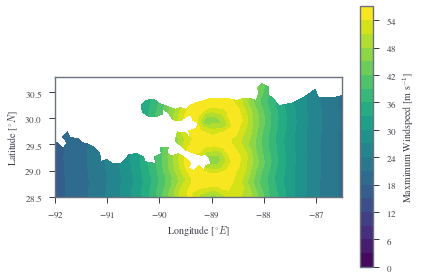

In [20]:
folder = os.path.join(DATA_PATH, "kate_h08")
path = os.path.join(folder, "maxele.63.nc")
maxele = Maxele(path, crs="EPSG:4326")
maxele.tricontourf(cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()
plt.clf()
path = os.path.join(folder, "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

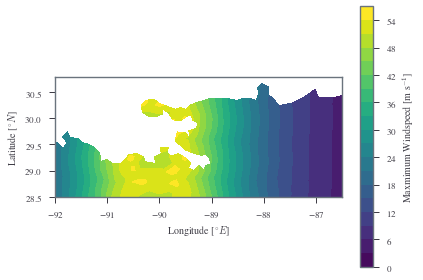

In [14]:
path = os.path.join(DATA_PATH, "kat_h80", "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

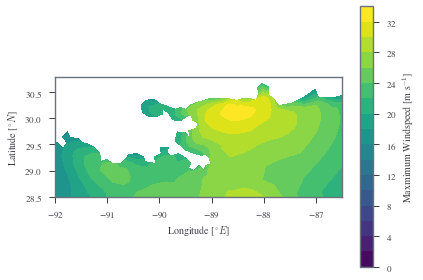

In [15]:
path = os.path.join(DATA_PATH, "mult1", "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

In [ ]:
from src.constants import NEW_ORLEANS
from sithom.place import Point

point = Point(NEW_ORLEANS.lon + 1.5, NEW_ORLEANS.lat)

In [ ]:
point

[('Latitude', 29.9511, 'degrees_north'), ('Longitude', -88.5715, 'degrees_east'), 'NONE']

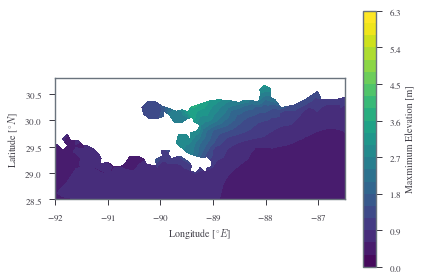

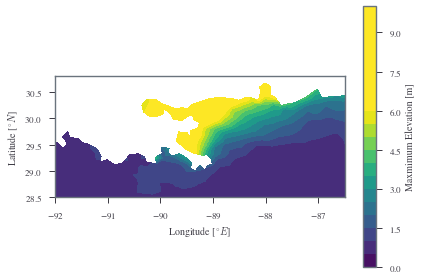

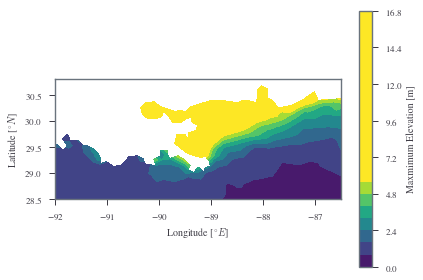

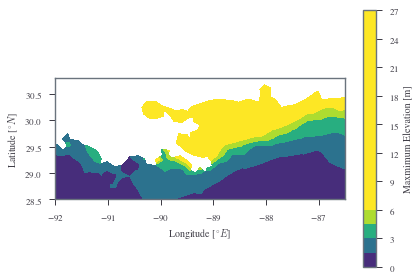

In [ ]:
for i in [1, 2, 3, 4]:
    folder = mult_folder_name(i)
    path = os.path.join(folder, "maxele.63.nc")
    maxele = Maxele(path, crs="EPSG:4326")
    maxele.tricontourf(
        cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6
    )
    NO_BBOX.ax_lim(plt.gca())
    plt.xlabel("Longitude [$^{\circ}E$]")
    plt.ylabel("Latitude [$^{\circ}N$]")
    plt.show()

In [ ]:
sorted(
    [x / 4 for x in range(16) if x not in list(range(0, 16, 4))]
    + [x for x in range(1, 4)]
)

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]